In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = np.linspace(-5,5,1000)

w = 1
m = 1
h_barra = 1

In [14]:
def V(x):
    return 0.5*m*w**2*x**2

In [52]:
def Numerov(x,E):
    R = (2*m*V(x)/h_barra**2) - (2*m*E/h_barra**2)
    S = np.zeros_like(R)
    
    psi = np.zeros_like(x)
    psi[0] = 0
    psi[1] = 1e-5
    
    h = x[1]-x[0]
    
    for i in range(1,len(psi)-1):
        
        a = h**2*(S[i+1]+10*S[i]+S[i-1])/12
        b = 2*(1 + 5*h**2*R[i]/12)*psi[i]
        c = (1-h**2*R[i-1]/12)*psi[i-1]
        d = 1 - h**2*R[i+1]/12
        
        psi[i+1] = (a + b - c) / d
        
    return psi

In [53]:
E = np.arange(0,6,0.5)

E_levels = []

for i in E:
    if Numerov(x,i)[-1]*Numerov(x,i+0.001)[-1] < 0:
        E_levels.append(i)

In [54]:
E_levels

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

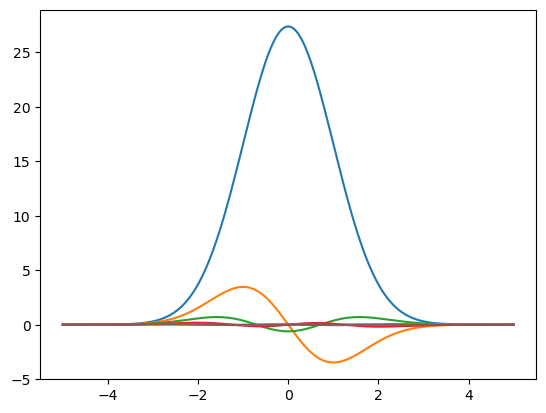

In [59]:
for i in E_levels:
    plt.plot(x,Numerov(x,i))
 